## Problems

Download the *email-Eu-core* directed network from the SNAP dataset repository available at http://snap.stanford.edu/data/email-Eu-core.html.

For this dataset compute the following network parameters:

### Import packages

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import Counter

### Load edges into networkx

In [2]:
G = nx.read_edgelist('email-Eu-core.txt', create_using=nx.DiGraph)

### 1. Number of nodes

In [3]:
print('Number of nodes:', len(G.nodes()))

Number of nodes: 1005


### 2. Number of edges

In [4]:
print('Number of edges:', len(G.edges()))

Number of edges: 25571


### 3. In-degree, out-degree and degree of the first five nodes

In [5]:
for x in list(G.nodes)[0:5]:
    print('node:', x, 'in-degree:', G.in_degree(x), 'out-degree:', G.out_degree(x), 'degree:', G.degree(x))

node: 0 in-degree: 32 out-degree: 41 degree: 73
node: 1 in-degree: 51 out-degree: 1 degree: 52
node: 2 in-degree: 77 out-degree: 84 degree: 161
node: 3 in-degree: 62 out-degree: 56 degree: 118
node: 4 in-degree: 74 out-degree: 89 degree: 163


### 4. Number of source nodes

A vertex with zero in-degree is called a *source vertex*.

In [6]:
source_nodes = [node for node, indegree in G.in_degree(G.nodes()) if indegree == 0]
print('Number of source nodes:', len(source_nodes))

Number of source nodes: 14


### 5. Number of sink nodes

A vertex with zero out-degree is called a *sink vertex*.

In [7]:
sink_nodes = [node for node, outdegree in G.out_degree(G.nodes()) if outdegree == 0]
print('Number of sink nodes:', len(sink_nodes))

Number of sink nodes: 137


### 6. Number of isolated nodes

A vertex with in-degree and out-degree both equal to zero is called an *isolated vertex*.

In [8]:
isolated_nodes = [node for node, degree in G.degree(G.nodes()) if degree == 0]
print('Number of isolated nodes:', len(isolated_nodes))

Number of isolated nodes: 0


### 7. In-degree distribution

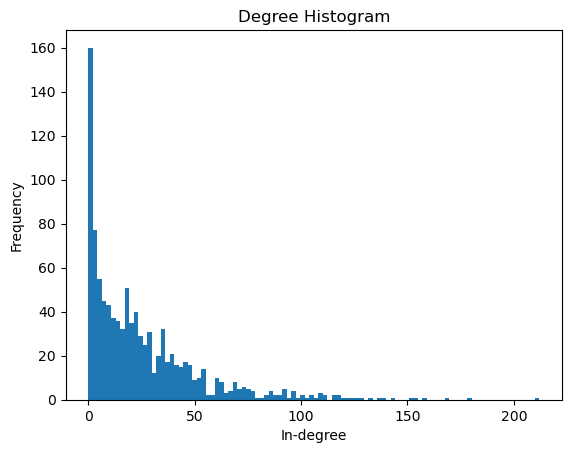

In [9]:
deg_seq = [G.in_degree(x) for x in nx.nodes(G)]
plt.hist(deg_seq, bins=100)
plt.title('Degree Histogram')
plt.xlabel('In-degree')
plt.ylabel('Frequency')
plt.show()

### 8. Out-degree distribution

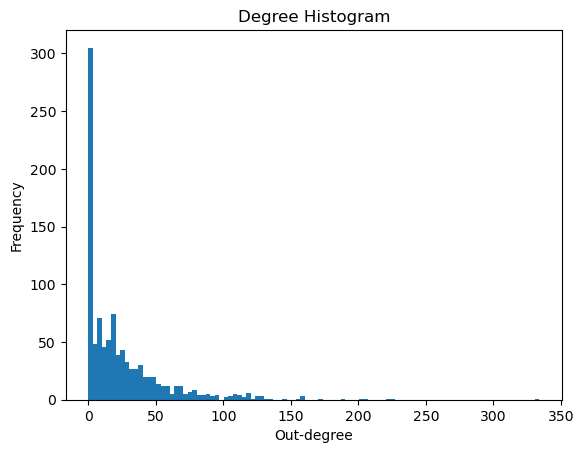

In [10]:
deg_seq = [G.out_degree(x) for x in nx.nodes(G)]

plt.hist(deg_seq, bins=100)
plt.title('Degree Histogram')
plt.xlabel('Out-degree')
plt.ylabel('Frequency')
plt.show()

### 9. Average degree, average in-degree and average out-degree

In [11]:
# calculate average degree
avg_degree = sum(dict(G.degree()).values()) / len(G.nodes)
print("Average degree: ", avg_degree)

# calculate average in-degree
avg_in_degree = sum(dict(G.in_degree()).values()) / len(G.nodes)
print("Average in-degree: ", avg_in_degree)

# calculate average out-degree
avg_out_degree = sum(dict(G.out_degree()).values()) / len(G.nodes)
print("Average out-degree: ", avg_out_degree)

Average degree:  50.88756218905473
Average in-degree:  25.443781094527363
Average out-degree:  25.443781094527363


### 10. Distance between five pairs of random nodes

In [12]:
# get a list of nodes in the graph
nodes = list(G.nodes)

# choose five random pairs of nodes
node_pairs = []
for i in range(5):
    pair = random.sample(nodes, 2)
    node_pairs.append(tuple(pair))
    
print(node_pairs)

# calculate shortest paths for each pair of nodes
for pair in node_pairs:
    source, target = pair
    try:
        distance = nx.shortest_path_length(G, source=source, target=target)
        print(f"Distance between nodes {source} and {target}: {distance}")
    except nx.NodeNotFound as e:
        print(f"Node not found: {e}")
    except nx.NetworkXNoPath as e:
        print(f"No path found: {e}")


[('168', '592'), ('183', '808'), ('761', '33'), ('593', '206'), ('691', '390')]
Distance between nodes 168 and 592: 2
No path found: No path between 183 and 808.
No path found: No path between 761 and 33.
Distance between nodes 593 and 206: 2
No path found: No path between 691 and 390.


### 11. Shortest path length distribution

In [13]:
# compute the shortest path lengths between all pairs of nodes
path_lengths = []
for node in G.nodes:
    lengths = nx.shortest_path_length(G, node)
    path_lengths += list(lengths.values())

# count the occurrences of each shortest path length
path_length_counts = Counter(path_lengths)

# print the distribution of shortest path lengths
print("Shortest path length distribution:")
for length, count in sorted(path_length_counts.items()):
    print(f"{length}: {count}")

Shortest path length distribution:
0: 1005
1: 24929
2: 305792
3: 385835
4: 71358
5: 4372
6: 140
7: 3


### 12. Diameter

In [14]:
# get list of strongly connected components
sccs = list(nx.strongly_connected_components(G))

# find largest strongly connected component
largest_scc = max(sccs, key=len)

# create subgraph of largest strongly connected component
subgraph = G.subgraph(largest_scc)


# compute the eccentricity of each node in the graph
eccentricities = nx.eccentricity(subgraph)

# compute the diameter of the graph
diameter = max(eccentricities.values())

# print the diameter of the graph
print(f"Diameter: {diameter}")

Diameter: 6


### 13. Is the graph strongly connected? If so, compute the strongly connected component size distribution

In [15]:
import networkx as nx
from collections import Counter

# check if the graph is strongly connected
if nx.is_strongly_connected(G):
    print("The graph is strongly connected.")
else:
    print("The graph is not strongly connected.")

    # compute the strongly connected components
    sccs = list(nx.strongly_connected_components(G))

    # compute the size distribution of strongly connected components
    scc_sizes = [len(scc) for scc in sccs]
    scc_size_counts = Counter(scc_sizes)

    # print the size distribution of strongly connected components
    print("Strongly connected component size distribution:")
    for size, count in sorted(scc_size_counts.items()):
        print(f"{size}: {count}")

The graph is not strongly connected.
Strongly connected component size distribution:
1: 202
803: 1


### 14. Is the graph weakly connected? If so, compute the weakly connected component size distribution

In [16]:
# check if the graph is weakly connected
if nx.is_weakly_connected(G):
    print("The graph is weakly connected.")
else:
    print("The graph is not weakly connected.")

    # compute the weakly connected components
    wccs = list(nx.weakly_connected_components(G))

    # compute the size distribution of weakly connected components
    wcc_sizes = [len(wcc) for wcc in wccs]
    wcc_size_counts = Counter(wcc_sizes)

    # print the size distribution of weakly connected components
    print("Weakly connected component size distribution:")
    for size, count in sorted(wcc_size_counts.items()):
        print(f"{size}: {count}")

The graph is not weakly connected.
Weakly connected component size distribution:
1: 19
986: 1


### 15. Number of bridge edges

In [17]:
# get a list of weakly connected components
weakly_connected_components = list(nx.weakly_connected_components(G))

# find the largest weakly connected component
largest_weakly_connected_component = max(weakly_connected_components, key=len)

# print the size of the largest weakly connected component
print(f"Size of largest weakly connected component: {len(largest_weakly_connected_component)}")

# create a subgraph based on the largest weakly connected component
subgraph = G.subgraph(largest_weakly_connected_component).copy()

# initialize a counter variable for bridge edges
num_bridge_edges = 0

# make a copy of the list of edges to avoid dictionary change errors
edges = list(subgraph.edges())

# iterate over edges and check if they are bridge edges
for u, v in edges:
    # remove edge (u, v) from the graph
    subgraph.remove_edge(u, v)
    
    # check if the graph is still weakly connected
    if not nx.is_weakly_connected(subgraph):
        num_bridge_edges += 1
    
    # add edge (u, v) back to the graph
    subgraph.add_edge(u, v)

# print the number of bridge edges
print(f"Number of bridge edges: {num_bridge_edges}")

Size of largest weakly connected component: 986
Number of bridge edges: 82


### 16. Number of articulation nodes

In [18]:
# convert directed graph to undirected graph
G_undirected = G.to_undirected()

# get list of articulation nodes
articulation_nodes = list(nx.articulation_points(G_undirected))

# print number of articulation nodes
print(f"Number of articulation nodes: {len(articulation_nodes)}")


Number of articulation nodes: 73


### 17. Number of nodes in In(v) for five random nodes

In [19]:
# choose five random nodes
random_nodes = random.sample(list(G.nodes()), 5)

# print number of nodes in the in-neighborhood of each random node
for node in random_nodes:
    in_neighbors = G.predecessors(node)
    print(f"Number of nodes in In({node}): {len(list(in_neighbors))}")

Number of nodes in In(60): 39
Number of nodes in In(465): 9
Number of nodes in In(424): 90
Number of nodes in In(899): 1
Number of nodes in In(947): 8


### 18. Number of nodes in Out(v) for five random nodes

In [20]:
# choose five random nodes
random_nodes = random.sample(list(G.nodes()), 5)

# print number of nodes in the out-neighborhood of each random node
for node in random_nodes:
    out_neighbors = G.successors(node)
    print(f"Number of nodes in Out({node}): {len(list(out_neighbors))}")


Number of nodes in Out(267): 10
Number of nodes in Out(207): 14
Number of nodes in Out(291): 24
Number of nodes in Out(801): 0
Number of nodes in Out(731): 1


### 19. Clustering coefficient for five random nodes

In [21]:
# choose five random nodes
random_nodes = random.sample(list(G.nodes()), 5)

# print clustering coefficient of each random node
for node in random_nodes:
    clustering_coeff = nx.clustering(G, node)
    print(f"Clustering coefficient of node {node}: {clustering_coeff}")

Clustering coefficient of node 748: 0.34953940634595704
Clustering coefficient of node 346: 0.3661417322834646
Clustering coefficient of node 108: 0.2635643564356436
Clustering coefficient of node 321: 0.33636363636363636
Clustering coefficient of node 780: 0


### 20. Clustering coefficient distribution

In [22]:
# compute clustering coefficients of all nodes
clustering_coeffs = nx.clustering(G)

# compute mean clustering coefficient of graph
mean_clustering_coeff = np.mean(list(clustering_coeffs.values()))

# compute clustering coefficient distribution
clustering_coeff_distribution = np.array(list(clustering_coeffs.values()))

# print results
print(f"Mean clustering coefficient: {mean_clustering_coeff}")
print(f"Clustering coefficient distribution: {clustering_coeff_distribution}")

Mean clustering coefficient: 0.3656613629131561
Clustering coefficient distribution: [0.25264658 0.21836735 0.29091637 ... 0.         0.         0.        ]


### 21. Average clustering coefficient

In [23]:
# compute the average clustering coefficient
avg_cc = nx.average_clustering(G)

# print the result
print(f"Average clustering coefficient: {avg_cc}")

Average clustering coefficient: 0.3656613629131559
